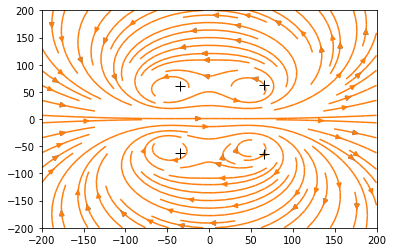

In [14]:
"""
Insert description of the code

@author: Samy Boutros
@collab: Guilherme H. Caumo
2/12/2024
"""
import numpy as np
import matplotlib.pyplot as plt

# Time between iterations
dt = 5
# Number of iterations
Nsteps = 50

## Setting up initial conditions (vortex centres and circulation) Vortex rings
y_v = np.array([-50, 50, -50, 50], dtype="f")  # y positions of the 4 vortices
x_v = np.array([-50, -50, 50, 50], dtype="f")  # x positions of the 4 vortices
k_v = np.array([40, -40, 40, -40])  # line vortex constants for the 4 vortices

# Set up the plot
plt.ion()
fig, ax = plt.subplots(1, 1)
p, = ax.plot(x_v, y_v, 'k+', markersize=10)  

# Size of the simulation grid
ngrid = 200
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j]  # Modifying Resolution
vel_x = np.zeros(np.shape(Y))  # This holds x-velocity
vel_y = np.zeros(np.shape(Y))  # This holds y-velocity

# Sets the radius size for the vortexes to better visualise their centers
r_mask = 5

# Function to calculate velocity field
def vortex_velocity(vort_x, vort_y, k_v, X, Y, r_mask=0):
    r = np.sqrt((X - vort_x)**2 + (Y - vort_y)**2)
    mask_center = np.where(r < r_mask, np.nan, r)
    theta = np.arctan2(Y - vort_y, X - vort_x)
    vel_x = k_v * np.sin(theta) / mask_center
    vel_y = -k_v * np.cos(theta) / mask_center
    return vel_x, vel_y

# Initial velocity field calculation
for i in range(len(x_v)):
    vx, vy = vortex_velocity(x_v[i], y_v[i], k_v[i], X, Y, r_mask)
    vel_x += vx
    vel_y += vy

ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])
ax.streamplot(X, Y, vel_x, vel_y, density=[1, 1])
fig.canvas.draw()

# Evolution
count = 0
while count < Nsteps:
    vel_x = np.zeros(np.shape(X)) # Sets x/y velocity matrices to be zeroes and then updated later
    vel_y = np.zeros(np.shape(Y))
    
    for i in range(len(x_v)):
        vx, vy = vortex_velocity(x_v[i], y_v[i], k_v[i], X, Y, r_mask)
        vel_x += vx
        vel_y += vy
    
    # Evolution of vortex positions after each time step dt
    for i in range(len(x_v)):
        x_v[i] += dt * np.nanmean(vel_x[(Y >= y_v[i] - r_mask) & (Y <= y_v[i] + r_mask) &
                                        (X >= x_v[i] - r_mask) & (X <= x_v[i] + r_mask)])
        y_v[i] += dt * np.nanmean(vel_y[(Y >= y_v[i] - r_mask) & (Y <= y_v[i] + r_mask) &
                                        (X >= x_v[i] - r_mask) & (X <= x_v[i] + r_mask)])
    p.set_xdata(x_v)
    p.set_ydata(y_v)
    
    # Clear and update streamlines
    for coll in ax.collections:
        coll.remove()

    for patch in ax.patches:
        patch.remove()
    
    ax.streamplot(X, Y, vel_x, vel_y, density=[1, 1])
    fig.canvas.draw()
    plt.pause(0.001)
    count += 1